# Dirichlet Process Mixture Models with Python 

by Emil Vassev

March 5, 2025
<br><br>
Copyright (C) 2025 - All rights reserved, do not copy or distribute without permission of the author.
***

<span style="color:blue">Welcome to <b>Dirichlet Process Mixture Models with Python</b>, an interactive lecture designed to give you experience with Dirichlet Process Mixture Models in Python.</span>

## Clustering

* A process of grouping similar data points. 
* The objective is to discover natural grouping within a dataset in such a way that data points within the same cluster are more similar to each other than they are to data points in another cluster. 
* Unsupervised ML where an algorithm explores the data structure without prior knowledge of class labels or categories.

### Similarity Measure

* Clustering algorithms typically rely on a measure of similarity or dissimilarity between data points. 
* Common measures include Euclidean distance, cosine similarity, or other distance metrics

### Grouping Criteria
* Clusters are formed based on a *grouping criterion* - determines how data points should be combined. 

## Dirichlet Process Mixture Models (DPMM)

* **Mixture Models** - provide a principled, Bayesian approach to clustering:
    * **Fnite Mxture Mdels** - rquire the number of components (clusters) to be specified before fitting the model - difficult task that require expensive techniques, e.g., cross-validation.
    * **Infinite Mixture Models** - estimate the number of components automaticaly by estimating the optimal number of components from the data and obtaining a posterior over the number of components.

### Dirichlet Process (DP) 
* A distribution over probability distributions - each draw from a Dirichlet process is itself a distribution. 
    * defined by a concentration (scaling) parameter 𝛼 and a base distribution $𝐺_0$
    
      $𝐷𝑃(𝛼,𝐺_0 (𝛩))$, where: $𝛼$ - positive scaling parameter, $𝐺_0$ - base distribution, $𝛩$ - parameters of the mixture model
      <br/>
    
* A stochastic proces used in Bayesian Non-Parametric Models of data.

* DPMM uses DP as a prior. 

### Definition
Formally we can define DPMM as an extension of a Finite Mixture Model that allows for an infinite number of components that uses DP as a prior distribution for the mixture model, enabling the model to automatically determine the number of components or clusters needed to represent the data.

### How does the alpha shape our distribution?

* The scaling parameter $𝛼$ influences both the shape and concentration of the Dirichlet distribution.

* Higher values of $𝛼$ result in higher concentration around the mean probabilities.

* When all $𝛼$ are equal, the distribution is symmetric.

* When all $𝛼$ values differ, the distribution becomes more skewed.

## Implementing DPMM in Python

We use the **sklearn.mixture** library. 

https://scikit-learn.org/0.15/modules/mixture.html#mixture

The sklearn.mixture module implements mixture modeling algorithms.

### The BayesianGaussianMixture Class

This class implements two types of prior for the weights distribution: a finite mixture model with Dirichlet distribution and an infinite mixture model with the Dirichlet Process. The second type implements DPMM. 

Hyperparameters of mixture.BayesianGaussianMixture algorithm:

* **weight_concentration_prior_type**: {‘dirichlet_process’, ‘dirichlet_distribution’}, default=’dirichlet_process’ - a string describing the type of the weight concentration prior.

* **weight_concentration_prior**: float or None, default=None:
    * The dirichlet concentration of each component on the weight distribution (Dirichlet). 
    * This is the alpha parameter of DP - $𝐷𝑃(𝛼,𝐺0(𝛩))$. 
    * A higher concentration puts more mass in the center and will lead to more components being active, while a lower concentration parameter will lead to more mass at the edge of the mixture weights simplex. 
    * The value of the parameter must be greater than 0. If it is None, it’s set to 1.

* **n_components** - specifies the maximum number of components/clusters that the BayesianGaussianMixture model can consider.

### Import Python Libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA

### Prepare the Dataset

We use the **sklearn.datasets.load_iris** to load and return the **Iris** dataset for classification

In [3]:
# load the Iris dataset
iris = datasets.load_iris()

# load X variabels - clustering data
X = iris.data

# load target - true labels from the Iris dataset
labels_true = iris.target

In [4]:
# show the unique labels (clusters)
set(labels_true)

{0, 1, 2}

### Original Clusters

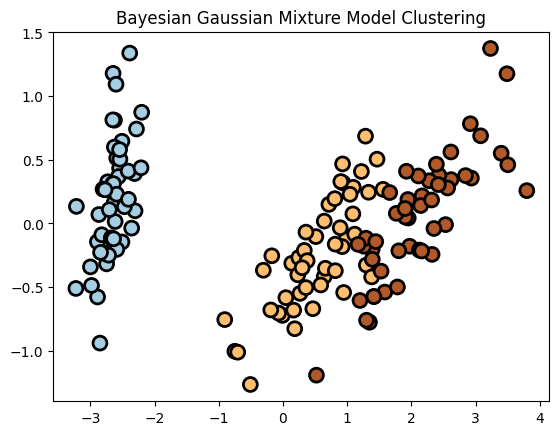

In [5]:
# perform dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_true, edgecolors='k', cmap=plt.cm.Paired, marker='o', s=100, linewidth=2)
plt.title('Bayesian Gaussian Mixture Model Clustering')
plt.show()

### Create and Fit the BayesianGaussianMixture Model

#### Test #1: alpha = 0.01

In [22]:
n_components = 100  # number of maximum components/clusters

alpha = 0.01 # dirichlet concentration

# fit BayesianGaussianMixture model
dpmm = BayesianGaussianMixture (
    n_components=n_components, 
    weight_concentration_prior=alpha, 
    covariance_type='full', 
    random_state=10, 
    max_iter=100
)

dpmm.fit(X)

# predict cluster assignments
labels_pred = dpmm.predict(X)

C:\Users\Emil.I.Vassev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
# show the unique labels (clusters)
set(labels_pred)

{2, 6, 7}

#### Test #1: Predicted Clusters

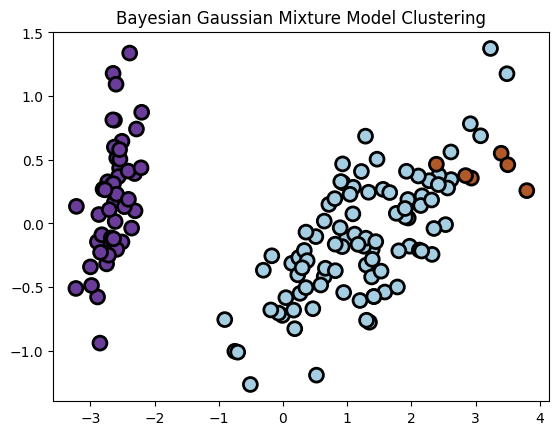

In [15]:
# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, edgecolors='k', cmap=plt.cm.Paired, marker='o', s=100, linewidth=2)
plt.title('Bayesian Gaussian Mixture Model Clustering')
plt.show()

#### Test #2: alpha = 10

In [10]:
n_components = 100  # number of maximum components/clusters

alpha = 10 # dirichlet concentration

# fit BayesianGaussianMixture model
dpmm = BayesianGaussianMixture (
    n_components=n_components, 
    weight_concentration_prior=alpha, 
    covariance_type='full', 
    random_state=10, 
    max_iter=100
)

dpmm.fit(X)

# predict cluster assignments
labels_pred = dpmm.predict(X)

C:\Users\Emil.I.Vassev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
# show the unique labels (clusters)
set(labels_pred)

{2, 7, 17, 33}

#### Test #2: Predicted Clusters

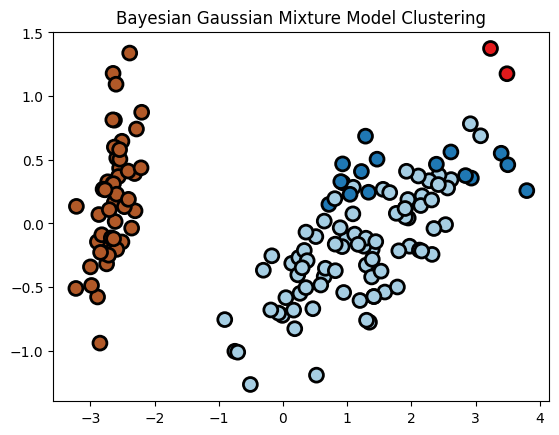

In [12]:
# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, edgecolors='k', cmap=plt.cm.Paired, marker='o', s=100, linewidth=2)
plt.title('Bayesian Gaussian Mixture Model Clustering')
plt.show()